# **Multiple Linear Regression Analysis**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

from statsmodels.formula.api import ols

In [2]:
data = pd.read_csv("/Users/andrespatrignani/Dropbox/Teaching/Scientific programming/introcoding-spring-2019/Datasets/corn_allometric_biomass.csv")
data.head(5)


,height_cm,stem_diam_mm,dry_biomass_g
0,71.0,5.7,0.66
1,39.0,4.4,0.19
2,55.5,4.3,0.30
3,41.5,3.7,0.16
4,40.0,3.6,0.14


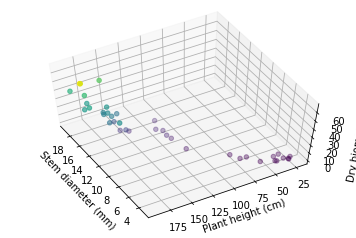

In [3]:
# Plot raw dataa and fitted model
# Necessary import for 3d plots.
# Great tutorial: https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = data.dry_biomass_g
xdata = data.stem_diam_mm
ydata = data.height_cm
ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.set_xlabel('Stem diameter (mm)')
ax.set_ylabel('Plant height (cm)')
ax.set_zlabel('Dry biomass (g)')

ax.view_init(60, 150)
plt.show()

# elev=None, azim=None
# elev = elevation angle in the z plane.
# azim = stores the azimuth angle in the x,y plane.

In [4]:
# Multiple Linear Regression using R-style formula input
# Does not require specifying the intercept

# Fit the model
model = ols("dry_biomass_g ~ height_cm + stem_diam_mm + height_cm*stem_diam_mm", data).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     63.71
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           4.87e-14
Time:                        14:17:45   Log-Likelihood:                -129.26
No. Observations:                  38   AIC:                             266.5
Df Residuals:                      34   BIC:                             273.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 18

In [5]:
# Multiple Linear Regression using Python- and Matlab-style formula input
# Requires specifying the intercept using an array of ones.

import statsmodels.api as sm
#X = np.array([data.stem_diam_mm,data.height_cm*data.stem_diam_mm])
X = np.column_stack((np.ones(data.shape[0]),
                     data.height_cm,data.stem_diam_mm,
                     data.height_cm*data.stem_diam_mm))

model = sm.OLS(data.dry_biomass_g, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     63.71
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           4.87e-14
Time:                        14:19:33   Log-Likelihood:                -129.26
No. Observations:                  38   AIC:                             266.5
Df Residuals:                      34   BIC:                             273.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8097      6.022      3.124      0.0

In [ ]:
# Height (x1) does not seem to be significant (high p-value and ranges including zero value)
# Run again prunning non-significant variables
# Cannot remove the variables and use previous coefficients!

In [6]:
# Run a prunned model
X = np.column_stack((np.ones(data.shape[0]),data.stem_diam_mm,data.height_cm*data.stem_diam_mm))

model_prunned = sm.OLS(data.dry_biomass_g, X)
results_prunned = model_prunned.fit()
print(results_prunned.summary())

results_prunned.params

# New fitting has:
# r-squared remains similar
# one less parameter
# Higher F-Statistic 90 vs 63
# AIC remains similar

                            OLS Regression Results                            
Dep. Variable:          dry_biomass_g   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     90.81
Date:                Tue, 16 Apr 2019   Prob (F-statistic):           1.40e-14
Time:                        14:19:36   Log-Likelihood:                -130.54
No. Observations:                  38   AIC:                             267.1
Df Residuals:                      35   BIC:                             272.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0338      5.263      2.666      0.0

const    14.033781
x1       -5.092159
x2        0.036719
dtype: float64

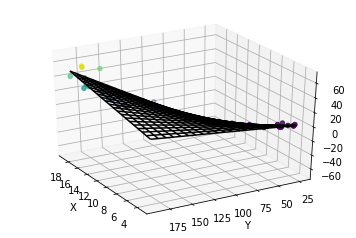

In [22]:
# Plot points with predicted model (which is a surface)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points (same code as in previous plot)
zdata = data.dry_biomass_g
xdata = data.stem_diam_mm
ydata = data.height_cm
ax.scatter3D(xdata, ydata, zdata, c=zdata);
ax.set_xlabel('Stem diameter (mm)')
ax.set_ylabel('Plant height (cm)')
ax.set_zlabel('Dry biomass (g)')

# Xgrid is grid of stem diameter
x = np.linspace(data.stem_diam_mm.min(), data.stem_diam_mm.max(), 21)

# Ygrid is grid of plant height
y = np.linspace(data.height_cm.min(), data.height_cm.max(), 21)

# We generate a 2D grid
Xgrid, Ygrid = np.meshgrid(x, y)

intercept = np.ones(Xgrid.shape)

# Z is the elevation of this 2D grid
Zgrid = intercept*results_prunned.params[0] + Xgrid*results_prunned.params[1] + Xgrid*Ygrid*results_prunned.params[2]

# Plot the data
#fig = plt.figure()
ax = fig.gca(projection='3d')
#surf = ax.plot_surface(Xgrid, Ygrid, Zgrid, cmap=plt.cm.coolwarm,rstride=1, cstride=1)
surf = ax.plot_wireframe(Xgrid, Ygrid, Zgrid, color='black')
#ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(30, 150)
plt.show()
